In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import imageio.v3 as iio

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
np.random.seed(42)

In [2]:
raw_ds = pd.read_csv('../train.csv') #Import the train data

raw_ds

,filepaths,Font
0,../input/english-fontnumber-recognition/Font/F...,x
1,../input/english-fontnumber-recognition/Font/F...,x
2,../input/english-fontnumber-recognition/Font/F...,x
3,../input/english-fontnumber-recognition/Font/F...,x
4,../input/english-fontnumber-recognition/Font/F...,x
...,...,...
62987,../input/english-fontnumber-recognition/Font/F...,n
62988,../input/english-fontnumber-recognition/Font/F...,n
62989,../input/english-fontnumber-recognition/Font/F...,n
62990,../input/english-fontnumber-recognition/Font/F...,n


In [3]:
print(raw_ds["Font"].unique())

print()
print(f'Number of class: {raw_ds["Font"].nunique()}')

['x' 'D' 'A' 'e' 'O' 'm' '9' 'G' 'V' '4' 'X' 'U' '2' '8' '1' 'p' 'Y' 'H'
 '3' 'J' 'y' 'S' 'Z' 'k' 'T' 'I' 'B' 'K' 's' 'E' 'd' 'q' 'u' 'M' 'W' '6'
 'a' 'v' 't' '0' 'P' 'j' 'Q' 'o' 'h' 'g' 'b' 'w' 'c' 'f' 'R' '7' 'N' 'L'
 'F' 'i' 'C' 'z' 'l' '5' 'r' 'n']

Number of class: 62


In [4]:
raw_ds['Font'].value_counts()

Font
x    1016
b    1016
M    1016
W    1016
6    1016
     ... 
I    1016
B    1016
K    1016
s    1016
n    1016
Name: count, Length: 62, dtype: int64

Every folder there are 1016, so this file map all the images we have on database, so we need to split it into train and test

However, We also need to import every image from the path, so let's create a function to do this automatically for us

But before this, let's check the shape of the images

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

The shape:(128, 128)


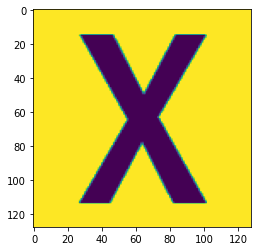

In [5]:
image = iio.imread(raw_ds['filepaths'][0])

print(image)

print()

print(f'The shape:{image.shape}')

plt.imshow(image)

So let's configure the shape

In [6]:
batch_size = 32
image_width = 128
image_height = 128

num_class = 62

# Train Test Split and preprocessing

We will use only 70% of dataset to reduce training time

In [7]:
raw_ds_70 , t = train_test_split(raw_ds, test_size=0.3, shuffle=True)

raw_ds_70

,filepaths,Font
25455,../input/english-fontnumber-recognition/Font/F...,I
53258,../input/english-fontnumber-recognition/Font/F...,N
52219,../input/english-fontnumber-recognition/Font/F...,7
45452,../input/english-fontnumber-recognition/Font/F...,h
28509,../input/english-fontnumber-recognition/Font/F...,s
...,...,...
62570,../input/english-fontnumber-recognition/Font/F...,n
38158,../input/english-fontnumber-recognition/Font/F...,v
860,../input/english-fontnumber-recognition/Font/F...,x
15795,../input/english-fontnumber-recognition/Font/F...,p


We will use 2 dataset:  

Train Dataset - 80%  
Validation Dataset - 20%

In [8]:
train_ds, val_ds = train_test_split(raw_ds_70, test_size=0.2, shuffle=True)

In [9]:
train_ds = train_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)

So now let's use the keras module "ImageDataGenerator()" to import and processing our images

In [10]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()

In [11]:
train_generator = train_datagen.flow_from_dataframe(
    train_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=(image_width, image_height),
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1./255
    )

val_generator = train_datagen.flow_from_dataframe(
    val_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=(image_width, image_height),
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1./255
)

Found 35275 validated image filenames belonging to 62 classes.
Found 8819 validated image filenames belonging to 62 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


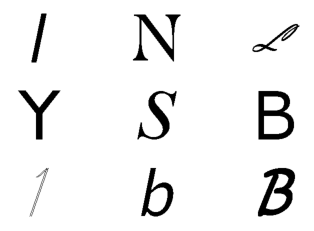

In [12]:
x, y = train_generator[0]
for i in range(9):
    image = x[i]
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.axis(False)

We have a a good amount of each label, we will not need to balance the labels

Let's start to use TensorFlow

In [14]:
input_shape = (image_width, image_height, 3)

In [93]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(image_width, image_height, 3)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build()

model.summary()

callbacks = [tf.keras.callbacks.TensorBoard('./keras')]

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 57600)             0         
                                                                 
 dense_30 (Dense)            (None, 128)             

In [94]:
early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1, callbacks=early_stop)

Epoch 1/10
1103/1103 [==============================] - 776s 702ms/step - loss: 6.6119 - accuracy: 0.6793 - val_loss: 0.7190 - val_accuracy: 0.8009
Epoch 2/10
1103/1103 [==============================] - 477s 432ms/step - loss: 0.4925 - accuracy: 0.8517 - val_loss: 0.6605 - val_accuracy: 0.8159
Epoch 3/10
1103/1103 [==============================] - 401s 364ms/step - loss: 0.3211 - accuracy: 0.9019 - val_loss: 0.7099 - val_accuracy: 0.8249


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(image_width, image_height, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1, callbacks=early_stop)

So with 2 epoch, we have our base line  

loss: 0.4925 - accuracy: 0.8517 - val_loss: 0.6605 - val_accuracy: 0.8159

We have a great baseline, however training time was too high, let's reprocess our data to increase training performance

# Dataset Variation

## 64x64 Pixels

We will use 3 dataset:  

Train Dataset - 72%  
Validation Dataset - 20%  
Test Dataset - 8%

In [13]:
batch_size = 32

new_size = (64,64)

num_class = 62

In [14]:
raw_train_ds, val_ds = train_test_split(raw_ds_70, test_size=0.2, shuffle=True)

train_ds, test_ds = train_test_split(raw_ds_70, test_size=0.1, shuffle=True)

train_ds = train_ds.reset_index(drop=True)
test_ds = test_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)

In [18]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    train_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255
    )

val_generator = train_datagen.flow_from_dataframe(
    val_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

test_generator = train_datagen.flow_from_dataframe(
    test_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

Found 39684 validated image filenames belonging to 62 classes.
Found 8819 validated image filenames belonging to 62 classes.
Found 4410 validated image filenames belonging to 62 classes.


The first thing we will do is reduce the resolution of the images  

They are 128x128 and i will test reduce first to 64x64 and if still perform well i will try reduce to 32x32 and evolve the performance

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


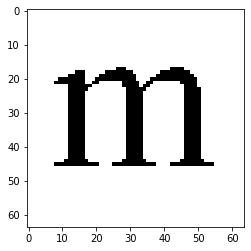

In [257]:
print(train_generator[0][0][0].shape)

plt.imshow(train_generator[0][0][0])

New Size ok, so let's run our model again and see how it performs

In [259]:
new_input_shape = (64,64,3)

In [261]:
model_64x64_raw = tf.keras.models.Sequential()

model_64x64_raw.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=new_input_shape))
model_64x64_raw.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_64x64_raw.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_64x64_raw.add(tf.keras.layers.MaxPooling2D((2, 2)))


model_64x64_raw.add(tf.keras.layers.Flatten())


model_64x64_raw.add(tf.keras.layers.Dense(128,activation='relu'))
model_64x64_raw.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model_64x64_raw.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_64x64_raw.build()

model_64x64_raw.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_64x64_raw.fit(train_generator, validation_data=val_generator, epochs=25, verbose=1, callbacks=early_stop)

Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_295 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_273 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_296 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_274 (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 12544)             0         
                                                                 
 dense_25 (Dense)            (None, 128)            

In [269]:
model_64x64_raw.evaluate(test_generator)

138/138 [==============================] - 4s 29ms/step - loss: 0.1105 - accuracy: 0.9667


[0.11049678176641464, 0.9666666388511658]

In [276]:
model_64x64_raw.save(r'\modelo.h5')

It was better than i was expecting lol, all the 18 epochs toke 40 minutes, but our base line toke 30 minutes to run 3 epochs

And our better results was:  

Epoch 15/25
147s 118ms/step - loss: 0.1036 - accuracy: 0.9646 - val_loss: 0.1520 - val_accuracy: 0.9605  

Test Score:  
loss: 0.1105 - accuracy: 0.9667

And this a really good result, but before we tunnig the model, let's check whats happening with the performance of our model if I reduce the image size to 32x32 pixels

## 32x32 Pixels

In [230]:
new_size = (32,32)

In [231]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    train_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255
    )

val_generator = train_datagen.flow_from_dataframe(
    val_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

test_generator = train_datagen.flow_from_dataframe(
    test_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

Found 39684 validated image filenames belonging to 62 classes.
Found 8819 validated image filenames belonging to 62 classes.
Found 4410 validated image filenames belonging to 62 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


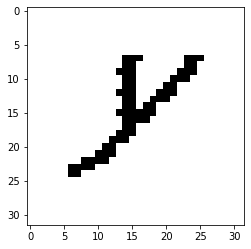

In [232]:
print(train_generator[0][0][0].shape)

plt.imshow(train_generator[0][0][0])

We can see a deterioration in our images

In [233]:
new_input_shape = (32,32,3)

Let's use the same model

In [235]:
model_32_x_32 = tf.keras.models.Sequential()

model_32_x_32.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=new_input_shape))
model_32_x_32.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_32_x_32.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_32_x_32.add(tf.keras.layers.MaxPooling2D((2, 2)))


model_32_x_32.add(tf.keras.layers.Flatten())

model_32_x_32.add(tf.keras.layers.Dense(128,activation='relu'))
model_32_x_32.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model_32_x_32.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_32_x_32.build()

model_32_x_32.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_32_x_32.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1, callbacks=early_stop)

Model: "sequential_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_274 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_252 (MaxPooli  (None, 15, 15, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_275 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_253 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)            

Epoch 12/50
1241/1241 [==============================] - 60s 49ms/step - loss: 0.2380 - accuracy: 0.9106 - val_loss: 0.2283 - val_accuracy: 0.9185

It took 15 minutes to run 15 epochs, honestly its not a bat result, because i used a model created for 128x128 image and trenined with 32x32 image, so changing some layers of the model it can perform better, but how the 64x64 was very good in training time, I will use this configuration on final model 

## Tunnig the model

In [262]:
batch_size = 32

new_size = (64,64)

num_class = 62

In [263]:
raw_train_ds, val_ds = train_test_split(raw_ds_70, test_size=0.2, shuffle=True)

train_ds, test_ds = train_test_split(raw_ds_70, test_size=0.1, shuffle=True)

train_ds = train_ds.reset_index(drop=True)
test_ds = test_ds.reset_index(drop=True)
val_ds = val_ds.reset_index(drop=True)

In [264]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    train_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255
    )

val_generator = train_datagen.flow_from_dataframe(
    val_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

test_generator = train_datagen.flow_from_dataframe(
    test_ds,
    x_col = 'filepaths',
    y_col='Font',
    target_size=new_size,
    class_mode='categorical',
    batch_size=batch_size,
    rescale=1.0/255.
)

Found 39684 validated image filenames belonging to 62 classes.
Found 8819 validated image filenames belonging to 62 classes.
Found 4410 validated image filenames belonging to 62 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


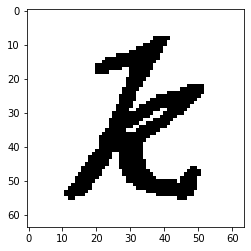

In [265]:
print(train_generator[0][0][0].shape)

plt.imshow(train_generator[0][0][0])

In [266]:
new_input_shape = (64,64,3)

mesmo que o modelo esteja treinando relativamente rapido, para o tunning eu vou fixar o numero de epocas em 10 e comparar com a mesma epoca do modelo original, e eu vou continuar usando o EarlyStopping 

Our Baseline:  

Epoch 10/25:  
116s 94ms/step - loss: 0.1493 - accuracy: 0.9476 - val_loss: 0.1753 - val_accuracy: 0.9460

In [270]:
model_64x64_Final = tf.keras.models.Sequential()

model_64x64_Final.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=new_input_shape))
model_64x64_Final.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_64x64_Final.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_64x64_Final.add(tf.keras.layers.MaxPooling2D((2, 2)))


model_64x64_Final.add(tf.keras.layers.Flatten())


model_64x64_Final.add(tf.keras.layers.Dense(128, activation='relu'))
model_64x64_Final.add(tf.keras.layers.Dropout(0.5))


model_64x64_Final.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model_64x64_Final.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_64x64_Final.build()

model_64x64_Final.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_64x64_Final.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1, callbacks=early_stop)

Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_299 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_277 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_300 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_278 (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 12544)             0         
                                                                 
 dense_29 (Dense)            (None, 128)            

In [271]:
model_64x64_Final.evaluate(test_generator)

138/138 [==============================] - 37s 266ms/step - loss: 0.4396 - accuracy: 0.8712


[0.4396379590034485, 0.8712018132209778]

# Test Model

In [24]:
label = train_generator.class_indices

label

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 'a': 36,
 'b': 37,
 'c': 38,
 'd': 39,
 'e': 40,
 'f': 41,
 'g': 42,
 'h': 43,
 'i': 44,
 'j': 45,
 'k': 46,
 'l': 47,
 'm': 48,
 'n': 49,
 'o': 50,
 'p': 51,
 'q': 52,
 'r': 53,
 's': 54,
 't': 55,
 'u': 56,
 'v': 57,
 'w': 58,
 'x': 59,
 'y': 60,
 'z': 61}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


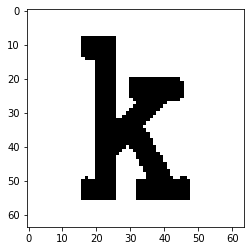

In [45]:
image_test = train_generator[0][0][0]

print(image_test.shape)

plt.imshow(image_test)

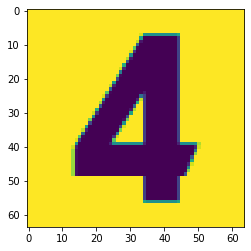

In [172]:
# Carregue a imagem de 500x500 pixels (substitua pelo seu caminho da imagem)
image_path = r'\english-fontnumber-recognition\Font\Font\Sample005\img005-00006.png'
image = cv2.imread(image_path)

# Redimensione a imagem para 64x64 pixels
target_size = (64, 64)
resized_image_4 = cv2.resize(image, target_size)

plt.imshow(resized_image_4[:, :, 0])

(64, 64, 4)


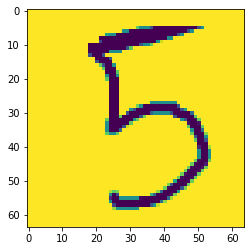

In [285]:
image_path = r'\desenho.png'
target_size = (64, 64)

image = iio.imread(image_path)

resized_image = cv2.resize(image, target_size)

print(resized_image.shape)

image_number = 255 - resized_image[:, :, 3]

plt.imshow(image_number)

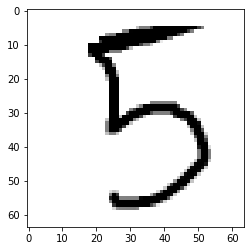

In [286]:
image_number

fundo_rgb = np.zeros((64, 64, 3), dtype=np.uint8)

fundo_rgb[:, :, 0] = image_number
fundo_rgb[:, :, 1] = image_number
fundo_rgb[:, :, 2] = image_number

plt.imshow(fundo_rgb)

(64, 64, 4)
1/1 [==============================] - 0s 122ms/step
v


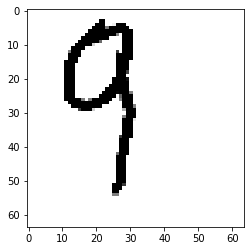

In [315]:
image_path = r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 3\Deploy\Web Deploy\desenho.png'
target_size = (64, 64)

image = iio.imread(image_path)

resized_image = cv2.resize(image, target_size)

print(resized_image.shape)

image_number = 255 - resized_image[:, :, 3]

plt.imshow(image_number)
image_number

fundo_rgb = np.zeros((64, 64, 3), dtype=np.uint8)

fundo_rgb[:, :, 0] = image_number
fundo_rgb[:, :, 1] = image_number
fundo_rgb[:, :, 2] = image_number

plt.imshow(fundo_rgb)
# Faça previsões no modelo
model = tf.keras.models.load_model(r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 3\modelo.h5')

input_image = np.expand_dims(fundo_rgb, axis=0)

predicted_probabilities = model.predict(input_image)


predicted_labels = np.argmax(predicted_probabilities, axis=1)


print(label[predicted_labels[0]])

                    V